# DataScience Practical - 3

# `180280116040` Dharmistha Kosti

## **Aim: Entropy, Information Gain and DATASET Attribute Ranking**

In [1]:
#importing libraries 
import pandas as pd
import seaborn as sns
import math
import numpy as np

In [2]:
Heart_data=pd.read_csv(r'C:\Users\HP\Downloads\dataset\heart_disease.csv')
Heart_data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
# Finding length of dataset
len(Heart_data)

1025

In [4]:
# Finding sum of null values
Heart_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

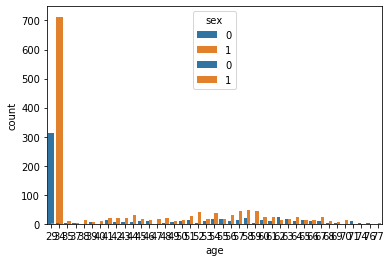

In [5]:
sns.countplot(x="sex",hue="target", data=Heart_data)
sns.countplot(x="sex", data=Heart_data)
sns.countplot(x="age",hue="sex", data=Heart_data)

In [6]:
## Make Age in Range of  0-9,10-19,...
AgeRange=pd.cut(Heart_data.age, bins=10, labels=np.arange(10), right=False)
New_Heart_data=pd.concat([Heart_data,AgeRange.rename('AgeRange')],axis=1)
New_Heart_data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,AgeRange
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,4
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,5
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,8
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,6
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,6


In [7]:
for  i in New_Heart_data.columns:
  print(i+ ":"+ str(New_Heart_data[i].nunique()))

age:41
sex:2
cp:4
trestbps:49
chol:152
fbs:2
restecg:3
thalach:91
exang:2
oldpeak:40
slope:3
ca:5
thal:4
target:2
AgeRange:10


In [8]:
len(New_Heart_data.age)

1025

In [9]:
Survived=len(New_Heart_data[New_Heart_data['target']==1])
SurvivedProb=Survived/len(New_Heart_data)
SurvivedProb

0.5131707317073171

In [10]:
NSurvived=len(New_Heart_data[New_Heart_data['target']==0])
NSurvivedProb=NSurvived/len(New_Heart_data)
NSurvivedProb

0.4868292682926829

In [11]:
# calculate the column wise entropy for the split in the dataset
def colentropy(list):
    if(sum(list)<=1.01):
        if "NaN" in list:
            return 0
        else:
            return sum([-i*np.log2(i) for i in list])
    else:
        print("Sum of Probabilties in Column is not 1 %5.4f " % sum(list))
        return 0

In [12]:
entropy = -(SurvivedProb * math.log2(SurvivedProb) + NSurvivedProb * math.log2(NSurvivedProb))
# print the result
print('entropy: %.3f bits' % entropy)

entropy: 0.999 bits


In [13]:
colentropy(New_Heart_data.target.value_counts()/len(New_Heart_data))

0.9994994187527655

In [14]:
colentropy(New_Heart_data.sex.value_counts()/len(New_Heart_data))

0.8865914760908439

In [15]:
colentropy(New_Heart_data.cp.value_counts()/len(New_Heart_data))

1.7264529972489449

In [16]:
colentropy(New_Heart_data.trestbps.value_counts()/len(New_Heart_data))

4.691862567518194

In [17]:
colentropy(New_Heart_data.AgeRange.value_counts()/len(New_Heart_data))

2.892477700750043

In [18]:
colentropy(New_Heart_data.thal.value_counts()/len(New_Heart_data))

1.3128051593763979

In [19]:
colentropy(New_Heart_data.ca.value_counts()/len(New_Heart_data))

1.6951932879964948

In [20]:
colentropy(New_Heart_data.slope.value_counts()/len(New_Heart_data))

1.301742342793691

In [21]:
colentropy(New_Heart_data.oldpeak.value_counts()/len(New_Heart_data))

4.149288249700883

In [22]:
colentropy(New_Heart_data.exang.value_counts()/len(New_Heart_data))

0.9215135925408615

In [23]:
colentropy(New_Heart_data.thalach.value_counts()/len(New_Heart_data))

6.165862446519403

In [24]:
colentropy(New_Heart_data.restecg.value_counts()/len(New_Heart_data))

1.0953329001518302

In [25]:
colentropy(New_Heart_data.fbs.value_counts()/len(New_Heart_data))

0.6080061737709006

In [26]:
colentropy(New_Heart_data.chol.value_counts()/len(New_Heart_data))

7.039829773535662

In [27]:
group = New_Heart_data.groupby(['sex', 'target']) 
Gender_survived = group.size().unstack() 
Gender_survived

target,0,1
sex,,
0,86,226
1,413,300


In [28]:
New_Heart_data.sex.value_counts(sort=False)

0    312
1    713
Name: sex, dtype: int64

In [29]:
New_Heart_data.sex.value_counts(sort=False)/len(New_Heart_data)

0    0.30439
1    0.69561
Name: sex, dtype: float64

In [30]:
group = New_Heart_data.groupby(['sex', 'target']) 
Gender_survived = group.size().unstack() 
FemaleEntropy=colentropy(Gender_survived.iloc[0]/New_Heart_data.sex.value_counts()[0])
MaleEntropy=colentropy(Gender_survived.iloc[1]/New_Heart_data.sex.value_counts()[1])
print("Male Entropy : "+str(MaleEntropy)+"\n Female Entropy : "+str(FemaleEntropy))

Male Entropy : 0.9818048732531515
 Female Entropy : 0.8494431983166945


In [31]:
#Gender Column Entropy
HS=colentropy(New_Heart_data.target.value_counts()/len(New_Heart_data))
print(HS)

0.9994994187527655


In [32]:
Val=New_Heart_data.sex.value_counts()/sum(Gender_survived.sum(axis=1))
HS-Val[0]*FemaleEntropy-Val[1]*MaleEntropy

0.057984148016857584

In [33]:
cp_group = New_Heart_data.groupby(['cp', 'target']) 
cp_survived = cp_group.size().unstack() 
cpEntropy0=colentropy(cp_survived.iloc[0]/New_Heart_data.cp.value_counts()[0])
cpEntropy1=colentropy(cp_survived.iloc[1]/New_Heart_data.cp.value_counts()[1])
cpEntropy2=colentropy(cp_survived.iloc[2]/New_Heart_data.cp.value_counts()[2])
cpEntropy3=colentropy(cp_survived.iloc[3]/New_Heart_data.cp.value_counts()[3])

cp_HS=colentropy(New_Heart_data.target.value_counts()/len(New_Heart_data))
print(cp_HS)

cp_Val=New_Heart_data.cp.value_counts()/sum(cp_survived.sum(axis=1))
HS-cp_Val[0]*cpEntropy0-cp_Val[1]*cpEntropy1-cp_Val[2]*cpEntropy2-cp_Val[3]*cpEntropy3

0.9994994187527655


0.20848408129015084

In [34]:
fbs_group = New_Heart_data.groupby(['fbs', 'target']) 
fbs_survived = fbs_group.size().unstack() 
fbsEntropy0=colentropy(fbs_survived.iloc[0]/New_Heart_data.fbs.value_counts()[0])
fbsEntropy1=colentropy(fbs_survived.iloc[1]/New_Heart_data.fbs.value_counts()[1])

fbs_Val=New_Heart_data.fbs.value_counts()/sum(fbs_survived.sum(axis=1))
HS-fbs_Val[0]*fbsEntropy0-fbs_Val[1]*fbsEntropy1

0.0012222219885129892

In [35]:
restecg_group = New_Heart_data.groupby(['restecg', 'target']) 
restecg_survived = restecg_group.size().unstack() 
restecgEntropy0=colentropy(restecg_survived.iloc[0]/New_Heart_data.restecg.value_counts()[0])
restecgEntropy1=colentropy(restecg_survived.iloc[1]/New_Heart_data.restecg.value_counts()[1])
restecgEntropy2=colentropy(restecg_survived.iloc[2]/New_Heart_data.restecg.value_counts()[2])

restecg_Val=New_Heart_data.restecg.value_counts()/sum(restecg_survived.sum(axis=1))
HS-restecg_Val[0]*restecgEntropy0-restecg_Val[1]*restecgEntropy1-restecg_Val[2]*restecgEntropy2

0.025564125201272558

In [36]:
exang_group = New_Heart_data.groupby(['exang', 'target']) 
exang_survived = exang_group.size().unstack() 
exangEntropy0=colentropy(exang_survived.iloc[0]/New_Heart_data.exang.value_counts()[0])
exangEntropy1=colentropy(exang_survived.iloc[1]/New_Heart_data.exang.value_counts()[1])

exang_Val=New_Heart_data.exang.value_counts()/sum(exang_survived.sum(axis=1))
HS-exang_Val[0]*exangEntropy0-exang_Val[1]*exangEntropy1

0.14508525466082522

In [37]:
slope_group = New_Heart_data.groupby(['slope', 'target']) 
slope_survived = slope_group.size().unstack() 
slopeEntropy0=colentropy(slope_survived.iloc[0]/New_Heart_data.slope.value_counts()[0])
slopeEntropy1=colentropy(slope_survived.iloc[1]/New_Heart_data.slope.value_counts()[1])
slopeEntropy2=colentropy(slope_survived.iloc[2]/New_Heart_data.slope.value_counts()[2])

slope_Val=New_Heart_data.slope.value_counts()/sum(slope_survived.sum(axis=1))
HS-slope_Val[0]*slopeEntropy0-slope_Val[1]*slopeEntropy1-slope_Val[2]*slopeEntropy2

0.11294554879194518

In [38]:
ca_group = New_Heart_data.groupby(['ca', 'target']) 
ca_survived = ca_group.size().unstack() 
caEntropy0=colentropy(ca_survived.iloc[0]/New_Heart_data.ca.value_counts()[0])
caEntropy1=colentropy(ca_survived.iloc[1]/New_Heart_data.ca.value_counts()[1])
caEntropy2=colentropy(ca_survived.iloc[2]/New_Heart_data.ca.value_counts()[2])
caEntropy3=colentropy(ca_survived.iloc[3]/New_Heart_data.ca.value_counts()[3])
caEntropy4=colentropy(ca_survived.iloc[4]/New_Heart_data.ca.value_counts()[4])

ca_Val=New_Heart_data.ca.value_counts()/sum(ca_survived.sum(axis=1))
HS-ca_Val[0]*caEntropy0-ca_Val[1]*caEntropy1-ca_Val[2]*caEntropy2-ca_Val[3]*caEntropy3-ca_Val[4]*caEntropy4

0.19254560055507045

In [39]:
thal_group = New_Heart_data.groupby(['thal', 'target']) 
thal_survived = thal_group.size().unstack() 
thalEntropy0=colentropy(thal_survived.iloc[0]/New_Heart_data.thal.value_counts()[0])
thalEntropy1=colentropy(thal_survived.iloc[1]/New_Heart_data.thal.value_counts()[1])
thalEntropy2=colentropy(thal_survived.iloc[2]/New_Heart_data.thal.value_counts()[2])
thalEntropy3=colentropy(thal_survived.iloc[3]/New_Heart_data.thal.value_counts()[3])

thal_Val=New_Heart_data.thal.value_counts()/sum(thal_survived.sum(axis=1))
HS-thal_Val[0]*thalEntropy0-thal_Val[1]*thalEntropy1-thal_Val[2]*thalEntropy2-thal_Val[3]*thalEntropy3

0.20777925965941457

In [40]:
#AgeRange_group = New_Heart_data.groupby(['AgeRange', 'target']) 
#AgeRange_survived = AgeRange_group.size().unstack() 
#AgeRangeEntropy0=colentropy(AgeRange_survived.iloc[0]/New_Heart_data.AgeRange.value_counts()[0])
#AgeRangeEntropy1=colentropy(AgeRange_survived.iloc[1]/New_Heart_data.AgeRange.value_counts()[1])
#AgeRangeEntropy2=colentropy(AgeRange_survived.iloc[2]/New_Heart_data.AgeRange.value_counts()[2])
#AgeRangeEntropy3=colentropy(AgeRange_survived.iloc[3]/New_Heart_data.AgeRange.value_counts()[3])
#AgeRangeEntropy4=colentropy(AgeRange_survived.iloc[4]/New_Heart_data.AgeRange.value_counts()[4])
#AgeRangeEntropy5=colentropy(AgeRange_survived.iloc[5]/New_Heart_data.AgeRange.value_counts()[5])
#AgeRangeEntropy6=colentropy(AgeRange_survived.iloc[6]/New_Heart_data.AgeRange.value_counts()[6])
#AgeRangeEntropy7=colentropy(AgeRange_survived.iloc[7]/New_Heart_data.AgeRange.value_counts()[7])
#AgeRangeEntropy8=colentropy(AgeRange_survived.iloc[8]/New_Heart_data.AgeRange.value_counts()[8])
#AgeRangeEntropy9=colentropy(AgeRange_survived.iloc[9]/New_Heart_data.AgeRange.value_counts()[9])

#AgeRange_Val=New_Heart_data.AgeRange.value_counts()/sum(AgeRange_survived.sum(axis=1))
#HS-AgeRange_Val[0]*AgeRangeEntropy0-AgeRange_Val[1]*AgeRangeEntropy1-AgeRange_Val[2]*AgeRangeEntropy2-AgeRange_Val[3]*AgeRangeEntropy3-AgeRange_Val[4]*AgeRangeEntropy4-AgeRange_Val[5]*AgeRangeEntropy5-AgeRange_Val[6]*AgeRangeEntropy6-AgeRange_Val[7]*AgeRangeEntropy7-AgeRange_Val[8]*AgeRangeEntropy8-AgeRange_Val[9]*AgeRangeEntropy9

In [41]:
print(cp_survived)
print(fbs_survived)
print(restecg_survived)
print(exang_survived)
print(slope_survived)
print(ca_survived)
print(thal_survived)
#AgeRange_survived

target    0    1
cp              
0       375  122
1        33  134
2        65  219
3        26   51
target    0    1
fbs             
0       417  455
1        82   71
target     0    1
restecg          
0        283  214
1        204  309
2         12    3
target    0    1
exang           
0       225  455
1       274   71
target    0    1
slope           
0        46   28
1       324  158
2       129  340
target    0    1
ca              
0       163  415
1       160   66
2       113   21
3        60    9
4         3   15
target    0    1
thal            
0         4    3
1        43   21
2       132  412
3       320   90
